# Exploration of Projection Spaces

In [2]:
# Feel free to add dependencies, but make sure that they are included in environment.yml

#disable some annoying warnings
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

#plots the figures in place instead of a new window
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
#import altair as alt
#from altair import datum
#alt.data_transformers.disable_max_rows()

from sklearn import manifold
from sklearn.decomposition import PCA
from openTSNE import TSNE
#from openTSNE.callbacks import ErrorLogger
from umap import UMAP

/Users/markus/opt/miniconda3/envs/xai_proj_space/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Data
To be able to explore paths in a projected space, you need to pick a problem/algorithm/model that consists of multiple states that change iteratively.

<details>
    <summary><a>Click to see an Example</a></summary>

    
An example is the solving of a Rubik's Cube. After each rotation the state of the cube changes. This results in a path from the initial state, through the individual rotations, to the solved cube.
By using projection, we can examine the individual states and paths in the two-dimensional space.
Depending on the initial state and the solution strategy the paths will differ or resemble each other.
    
This is an example of solving 10 randomly scrambled Rubik's Cubes with two different strategies, the Beginner (in green) and the Fridrich Method (in orange):
<div>
    <img alt="Rubiks's Cube Sovling Strategies" src="rubiks.png" width="600"/>
</div>
You can see that although each cube is scrambled differently in the beginning, both strategies converge to the same paths after a few steps.
You can also notice that the Beginner's method takes some additional paths that are not necessary with the Fridrich method.
</details>

### Read and Prepare Data
Read in your data from a file or create your own data.

Document any data processing steps.

In [15]:
data = pd.read_csv('data/cartpole_500_episodes_dqn.csv')
data.head()

,0,1,2,3,4,5
0,0.0,0.0,0.032045,-0.024308,-0.027468,0.011308
1,0.0,1.0,0.031559,-0.219026,-0.027242,0.295200
2,0.0,2.0,0.027178,-0.413749,-0.021338,0.579168
3,0.0,3.0,0.018903,-0.608565,-0.009754,0.865054
4,0.0,4.0,0.006732,-0.413312,0.007547,0.569320


In [16]:
data[data["0"].isin([0, 50, 200, 300, 400, 480])]

,0,1,2,3,4,5
0,0.0,0.0,0.032045,-0.024308,-0.027468,0.011308
1,0.0,1.0,0.031559,-0.219026,-0.027242,0.295200
2,0.0,2.0,0.027178,-0.413749,-0.021338,0.579168
3,0.0,3.0,0.018903,-0.608565,-0.009754,0.865054
4,0.0,4.0,0.006732,-0.413312,0.007547,0.569320
...,...,...,...,...,...,...
48615,480.0,393.0,-2.264621,-1.587204,-0.134428,-0.073839
48616,480.0,394.0,-2.296365,-1.390436,-0.135905,-0.405730
48617,480.0,395.0,-2.324174,-1.583396,-0.144020,-0.158793
48618,480.0,396.0,-2.355842,-1.386537,-0.147196,-0.493220


In [17]:
# Get the numbers of specified episodes
episodes_to_include = [0, 50, 200, 300, 400, 480]
# Filter the data to only include the specified episodes
filtered_data = data[data["0"].isin(episodes_to_include)]

# Convert the filtered data to a NumPy array
data = np.array(filtered_data)
print(data.shape)

(835, 6)


### Comments
- Did you transform, clean, or extend the data?  How/Why?

_TODO_

Training of the CartPole Agent
<div>
    <img alt="Training of the CartPole Agent" src="data//SequenceLength_episode.png" width="600"/>
</div>

## Projection
Project your data into a 2D space.
Try multiple (3+) projection methods (e.g., t-SNE, UMAP, MDS, PCA, ICA, other methods) with different settings and compare them.

Make sure that all additional dependencies are included when submitting.

In [18]:
def tsne_for_cartpole_sequences(sequences, perplexity=30, n_iter=250, n_components=2):
    tsne = manifold.TSNE(n_components=n_components, perplexity=perplexity, n_iter=n_iter)
    return tsne.fit_transform(sequences)

def umap_for_cartpole_sequences(sequences, n_neighbors=30, n_components=2):
    umap = UMAP(n_neighbors=n_neighbors, n_components=n_components)
    return umap.fit_transform(sequences)

def mds_for_cartpole_sequences(sequences, n_components=2):
    mds = manifold.MDS(n_components=n_components)
    return mds.fit_transform(sequences)

def pca_for_cartpole_sequences(sequences, n_components=2):
    pca = PCA(n_components=n_components)
    return pca.fit_transform(sequences)

In [19]:
tsne_embeddings = tsne_for_cartpole_sequences(data[:,2:],perplexity=5)
tsne_embeddings_with_labels = np.hstack((data[:,:2], tsne_embeddings))
print(tsne_embeddings_with_labels.shape)

umap_embeddings = umap_for_cartpole_sequences(data[:,2:],n_neighbors=5)
umap_embeddings_with_labels = np.hstack((data[:,:2], umap_embeddings))
print(umap_embeddings_with_labels.shape)

mds_embeddings = mds_for_cartpole_sequences(data[:,2:])
mds_embeddings_with_labels = np.hstack((data[:,:2], mds_embeddings))
print(mds_embeddings_with_labels.shape)

pca_embeddings = pca_for_cartpole_sequences(data[:,2:])
pca_embeddings_with_labels = np.hstack((data[:,:2], pca_embeddings))
print(pca_embeddings_with_labels.shape)

(835, 4)
(835, 4)
(835, 4)
(835, 4)


### Comments
- Which features did you use? Why?
- Which projection methods did you use? Why?
- Why did you choose these hyperparameters?
- Are there patterns in the global _and_ the local structure?

_TODO_

### Link States
Connect the states that belong together.

The states of a single solution should be connected to see the path from the start to the end state.
How the points are connected is up to you, for example, with straight lines or splines.

In [20]:
line_segments_tsne = []
line_segments_umap = []
line_segments_pca = []
line_segments_mds = []

# Iterate through the t-SNE embeddings and create line segments connecting consecutive data points
for i in range(len(tsne_embeddings_with_labels) - 1):
    start_point = tsne_embeddings_with_labels[i, 2:4]  # Assuming the columns are in the 2nd and 3rd positions
    end_point = tsne_embeddings_with_labels[i + 1, 2:4]
    line_segments_tsne.append((start_point, end_point))

    
    
    
for i in range(len(umap_embeddings_with_labels) - 1):
    start_point = umap_embeddings_with_labels[i, 2:4]  
    end_point = umap_embeddings_with_labels[i + 1, 2:4]
    line_segments_umap.append((start_point, end_point))

    

for i in range(len(mds_embeddings_with_labels) - 1):
    start_point = mds_embeddings_with_labels[i, 2:4]  
    end_point = mds_embeddings_with_labels[i + 1, 2:4]
    line_segments_mds.append((start_point, end_point))

    
    
for i in range(len(pca_embeddings_with_labels) - 1):
    start_point = pca_embeddings_with_labels[i, 2:4]  
    end_point = pca_embeddings_with_labels[i + 1, 2:4]
    line_segments_pca.append((start_point, end_point))


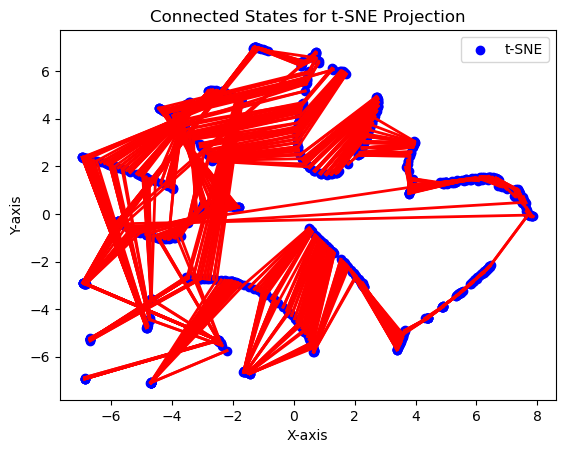

In [21]:
# Plot the t-SNE data points
plt.scatter(tsne_embeddings_with_labels[:, 2], tsne_embeddings_with_labels[:, 3], label='t-SNE', c='blue')

# Plot the connecting lines for t-SNE
for segment in line_segments_tsne:
    x, y = zip(*segment)
    plt.plot(x, y, c='red', linestyle='-', linewidth=2)

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Connected States for t-SNE Projection')
plt.legend()
plt.show()

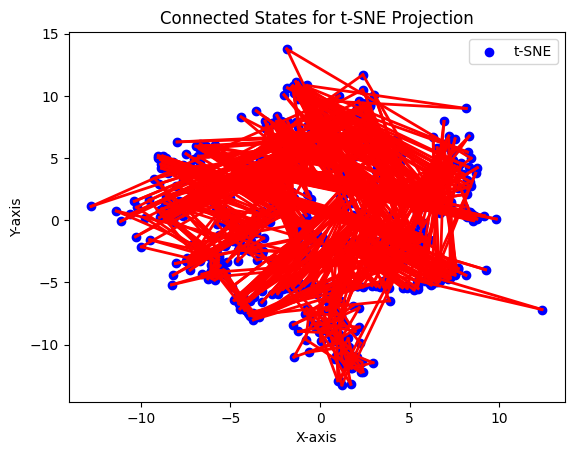

In [ ]:
# Plot the t-SNE data points
plt.scatter(tsne_embeddings_with_labels[:, 2], tsne_embeddings_with_labels[:, 3], label='t-SNE', c='blue')

# Plot the connecting lines for t-SNE
for segment in line_segments_tsne:
    x, y = zip(*segment)
    plt.plot(x, y, c='red', linestyle='-', linewidth=2)

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Connected States for t-SNE Projection')
plt.legend()
plt.show()

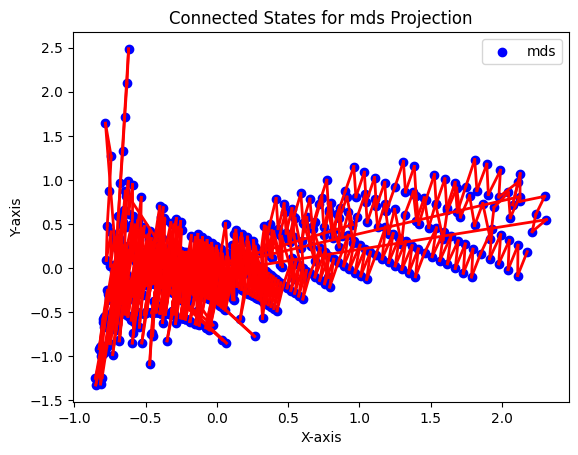

In [ ]:
# Plot the mds data points
plt.scatter(mds_embeddings_with_labels[:, 2], mds_embeddings_with_labels[:, 3], label='mds', c='blue')

# Plot the connecting lines for mds
for segment in line_segments_mds:
    x, y = zip(*segment)
    plt.plot(x, y, c='red', linestyle='-', linewidth=2)

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Connected States for mds Projection')
plt.legend()
plt.show()

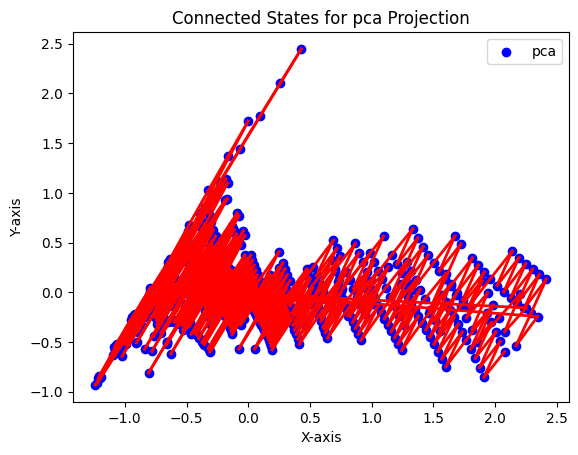

In [ ]:
# Plot the pca data points
plt.scatter(pca_embeddings_with_labels[:, 2], pca_embeddings_with_labels[:, 3], label='pca', c='blue')

# Plot the connecting lines for mds
for segment in line_segments_pca:
    x, y = zip(*segment)
    plt.plot(x, y, c='red', linestyle='-', linewidth=2)

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Connected States for pca Projection')
plt.legend()
plt.show()

In [ ]:
# Furthercode can be fetched from the cartpole_dqn_replaybuffer file

with open('cartpole_500_episodes_dqn.pkl', 'wb') as f:
    pickle.dump(all_states_list, f, pickle.HIGHEST_PROTOCOL)
with open('cartpole_500_episodes_dqn.pkl', 'rb') as f:
    loaded_pickle = pickle.load(f)

In [ ]:
def tsne_for_cartpole_sequences(sequences, perplexity=5, n_iter=1000, n_components=2):
    tsne = TSNE(n_components=n_components, perplexity=perplexity, n_iter=n_iter)
    return tsne.fit_transform(sequences)

In [ ]:
tsne_list = []

for sequence in loaded_pickle:
    tsne_list.append(tsne_for_cartpole_sequences(sequence))

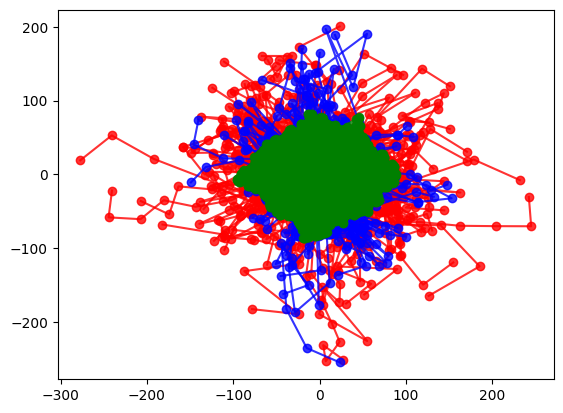

In [ ]:
for i, embedding in enumerate(tsne_list):
    if i < 100:
        plt.plot(embedding[:,0], embedding[:,1], '-o', alpha=0.8,c='r')
    if 100 <= i < 480:
        plt.plot(embedding[:,0], embedding[:,1], '-o', alpha=0.8,c='b')
    if i >= 480:
        plt.plot(embedding[:,0], embedding[:,1], '-o', alpha=0.8,c='g')

plt.show()

##### Here we can clearly observe that as longer we train the cartpole the denser are the points in the middle of the graph. This clearly shows that cartpole is no longer severly unstable anymore (i.e. falling in the left or right)

### Meta Data Encoding 
Encode addtional features in the visualization.

Use features of the source data and include them in the projection, e.g., by using color, opacity, different shapes, or line styles, etc.

In [ ]:
# TODO

### Comments
- Which features did you use? Why?
- How are the features encoded?

_TODO_

## Optional
<details>
    <summary><a>Projection Space Explorer (click to reveal)</a></summary>

    
<h2>Projection Space Explorer</h2>

The <a href="https://jku-vds-lab.at/pse/">Projection Space Explorer</a> is a web application to plot and connect two dimensional points. 
Metadata of the data points can be used to encode additonal information into the projection, e.g., by using different shapes or colors.
    
Further Information:
<ul>
    <li>Paper: <a href="https://jku-vds-lab.at/publications/2020_tiis_pathexplorer/">https://jku-vds-lab.at/publications/2020_tiis_pathexplorer/</a>
    <li>Repo: <a href="https://github.com/jku-vds-lab/projection-space-explorer/">https://github.com/jku-vds-lab/projection-space-explorer/</a>
    <li>Application Overview: <a href="https://jku-vds-lab.at/pse/">https://jku-vds-lab.at/pse/</a>
</ul>

<h3>Data Format</h3>
How to format the data can be found in the <a href="https://github.com/jku-vds-lab/projection-space-explorer/#data-format">Projection Space Explorer's README</a>.

Example data with three lines, with two colors (algo) and additional mark encoding (cp):

<table>
<thead>
  <tr>
    <th>x</th>
    <th>y</th>
    <th>line</th>
    <th>cp</th>
    <th>algo</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td>0.0</td>
    <td>0</td>
    <td>0</td>
    <td>start</td>
    <td>1</td>
  </tr>
  <tr>
    <td>2.0</td>
    <td>1</td>
    <td>0</td>
    <td>state</td>
    <td>1</td>
  </tr>
  <tr>
    <td>4.0</td>
    <td>4</td>
    <td>0</td>
    <td>state</td>
    <td>1</td>
  </tr>
  <tr>
    <td>6.0</td>
    <td>1</td>
    <td>0</td>
    <td>state</td>
    <td>1</td>
  </tr>
  <tr>
    <td>8.0</td>
    <td>0</td>
    <td>0</td>
    <td>state</td>
    <td>1</td>
  </tr>
  <tr>
    <td>12.0</td>
    <td>0</td>
    <td>0</td>
    <td>end</td>
    <td>1</td>
  </tr>
  <tr>
    <td>-1.0</td>
    <td>10</td>
    <td>1</td>
    <td>start</td>
    <td>2</td>
  </tr>
  <tr>
    <td>0.5</td>
    <td>5</td>
    <td>1</td>
    <td>state</td>
    <td>2</td>
  </tr>
  <tr>
    <td>2.0</td>
    <td>3</td>
    <td>1</td>
    <td>state</td>
    <td>2</td>
  </tr>
  <tr>
    <td>3.5</td>
    <td>0</td>
    <td>1</td>
    <td>state</td>
    <td>2</td>
  </tr>
  <tr>
    <td>5.0</td>
    <td>3</td>
    <td>1</td>
    <td>state</td>
    <td>2</td>
  </tr>
  <tr>
    <td>6.5</td>
    <td>5</td>
    <td>1</td>
    <td>state</td>
    <td>2</td>
  </tr>
  <tr>
    <td>8.0</td>
    <td>10</td>
    <td>1</td>
    <td>end</td>
    <td>2</td>
  </tr>
  <tr>
    <td>3.0</td>
    <td>6</td>
    <td>2</td>
    <td>start</td>
    <td>2</td>
  </tr>
  <tr>
    <td>2.0</td>
    <td>7</td>
    <td>2</td>
    <td>end</td>
    <td>2</td>
  </tr>
</tbody>
</table>



Save the dataset to CSV, e.g. using pandas: <tt>df.to_csv('data_path_explorer.csv', encoding='utf-8', index=False)</tt>  
    and upload it in the Projection Space Explorer by clicking on `OPEN FILE` in the top left corner.
    
ℹ You can also include your high dimensionmal data and use it to adapt the visualization.
    
</details>


## Results
You may add additional screenshots of the Projection Space Explorer.

In [ ]:
# TODO

### Interpretion
- What can be seen in the projection(s)?
- Was it what you expected? If not what did you expect?
- Can you confirm prior hypotheses from the projection?
- Did you get any unexpected insights?

_TODO_

## Submission
When you’ve finished working on this assignment please download this notebook as HTML and add it to your repository in addition to the notebook file.